# Machine Learning Pipeline For E-Commerce Data

Main task of this project is to create a sample data pipeline on a jupyter notebook for an ecommerce site with sample data also initialized for the same in numpy or and other libraries.

_Origin of Data:_  This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. Link to the full dataset [here](https://www.kaggle.com/datasets/carrie1/ecommerce-data/code})

### Part 1: Importing Dataset and Libraries

This is the first part of working on building a Data pipeline with Pandas, Numpy and

In this step I worked on the following:

* Importing necessary Python libraries.
* Loading our customer csv file 'customer_data.csv' into our Jupyter Notebook.
* Checking and inspecting the first rows and columns in our data set 

In [266]:
import os
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
#!pip install mlflow
import mlflow

import pdpipe as pdp

In [267]:
#loading the dataset

data = pd.read_csv('Data/data.csv', encoding = 'unicode_escape')

data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(541909, 8)

Since the original dataset is very large and has over 500000 values it is important to reduce it to a smaller size (100000) in order to avoid:

- Avoid Overfitting our model where the model performs poorly on new data.

- Train data more quickly and better evaluate performance of our model. 

In [268]:
def reduce_dataframe(df, max_rows=150000):
    return df.drop(df.index[max_rows:])

data = reduce_dataframe(data)
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    150000 non-null  object 
 1   StockCode    150000 non-null  object 
 2   Description  149427 non-null  object 
 3   Quantity     150000 non-null  int64  
 4   InvoiceDate  150000 non-null  object 
 5   UnitPrice    150000 non-null  float64
 6   CustomerID   103523 non-null  float64
 7   Country      150000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 9.2+ MB


(150000, 8)

In [269]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [270]:
data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
149995,549317,22423,REGENCY CAKESTAND 3 TIER,2,4/8/2011 9:58,12.75,15109.0,United Kingdom
149996,549317,21843,RED RETROSPOT CAKE STAND,2,4/8/2011 9:58,10.95,15109.0,United Kingdom
149997,549317,22853,CAT BOWL VINTAGE CREAM,6,4/8/2011 9:58,3.25,15109.0,United Kingdom
149998,549317,22852,DOG BOWL VINTAGE CREAM,4,4/8/2011 9:58,4.25,15109.0,United Kingdom
149999,549317,22845,VINTAGE CREAM CAT FOOD CONTAINER,2,4/8/2011 9:58,6.35,15109.0,United Kingdom


### Part 2: Cleaning and Preparing  the Dataset

In this section, in order to work with our data it is necessary to clean and prepare the data by:

1. Removing Null Values 
2. Removing duplicated Values
3. Filling Missing Values
4. Dropping rows with missing customerID


In [271]:
# dropping duplicates
data = data.drop_duplicates()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [272]:
#dropping null values 

data.isnull().dropna()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [273]:
data['Description'].fillna("None").head()

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
Name: Description, dtype: object

In [274]:
data['Description'].str.lower().str.contains("None").value_counts()

False    148071
Name: Description, dtype: int64

In [275]:
# Dropping rows with missing customerID
data.dropna(subset=['CustomerID'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
149995,549317,22423,REGENCY CAKESTAND 3 TIER,2,4/8/2011 9:58,12.75,15109.0,United Kingdom
149996,549317,21843,RED RETROSPOT CAKE STAND,2,4/8/2011 9:58,10.95,15109.0,United Kingdom
149997,549317,22853,CAT BOWL VINTAGE CREAM,6,4/8/2011 9:58,3.25,15109.0,United Kingdom
149998,549317,22852,DOG BOWL VINTAGE CREAM,4,4/8/2011 9:58,4.25,15109.0,United Kingdom


In [276]:
data.dropna(subset=["CustomerID"]).info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102183 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    102183 non-null  object 
 1   StockCode    102183 non-null  object 
 2   Description  102183 non-null  object 
 3   Quantity     102183 non-null  int64  
 4   InvoiceDate  102183 non-null  object 
 5   UnitPrice    102183 non-null  float64
 6   CustomerID   102183 non-null  float64
 7   Country      102183 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.0+ MB


(148644, 8)

In [277]:
data = data.dropna(subset=["CustomerID"])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [278]:
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]
data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08


In [349]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data["Year"] = data["InvoiceDate"].dt.year

In [279]:
data = data.drop(['StockCode'], axis = 1)


array([[<AxesSubplot: title={'center': 'Quantity'}>,
        <AxesSubplot: title={'center': 'UnitPrice'}>],
       [<AxesSubplot: title={'center': 'CustomerID'}>,
        <AxesSubplot: title={'center': 'TotalPrice'}>]], dtype=object)

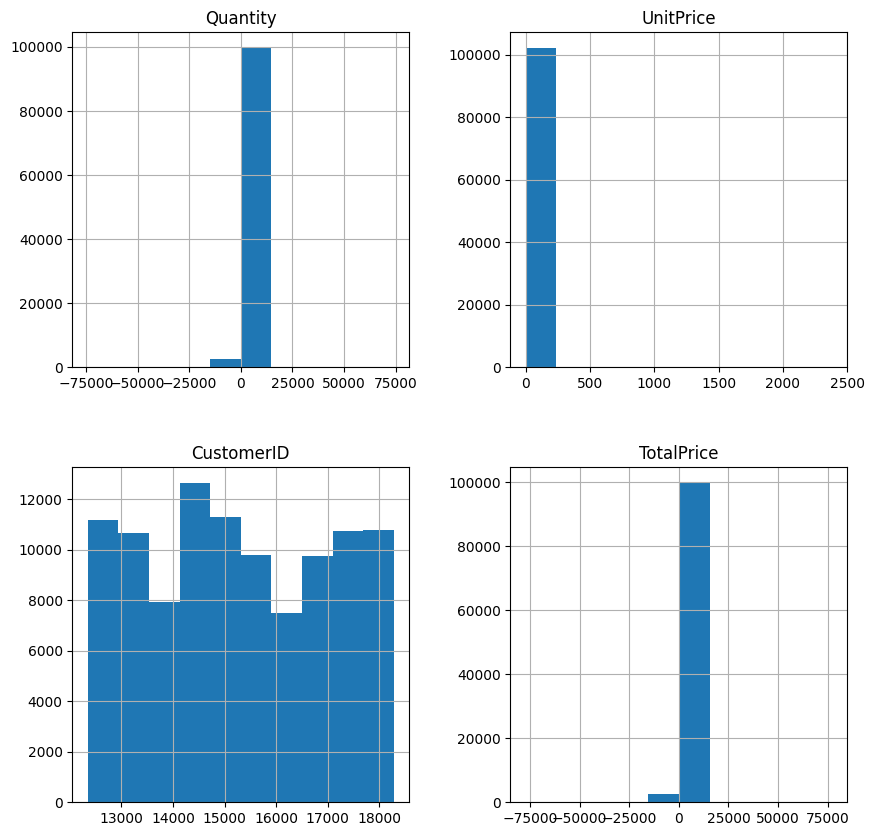

In [280]:
data.hist(bins=10, figsize=(10, 10))

Text(0.5, 0, 'Total Prices')

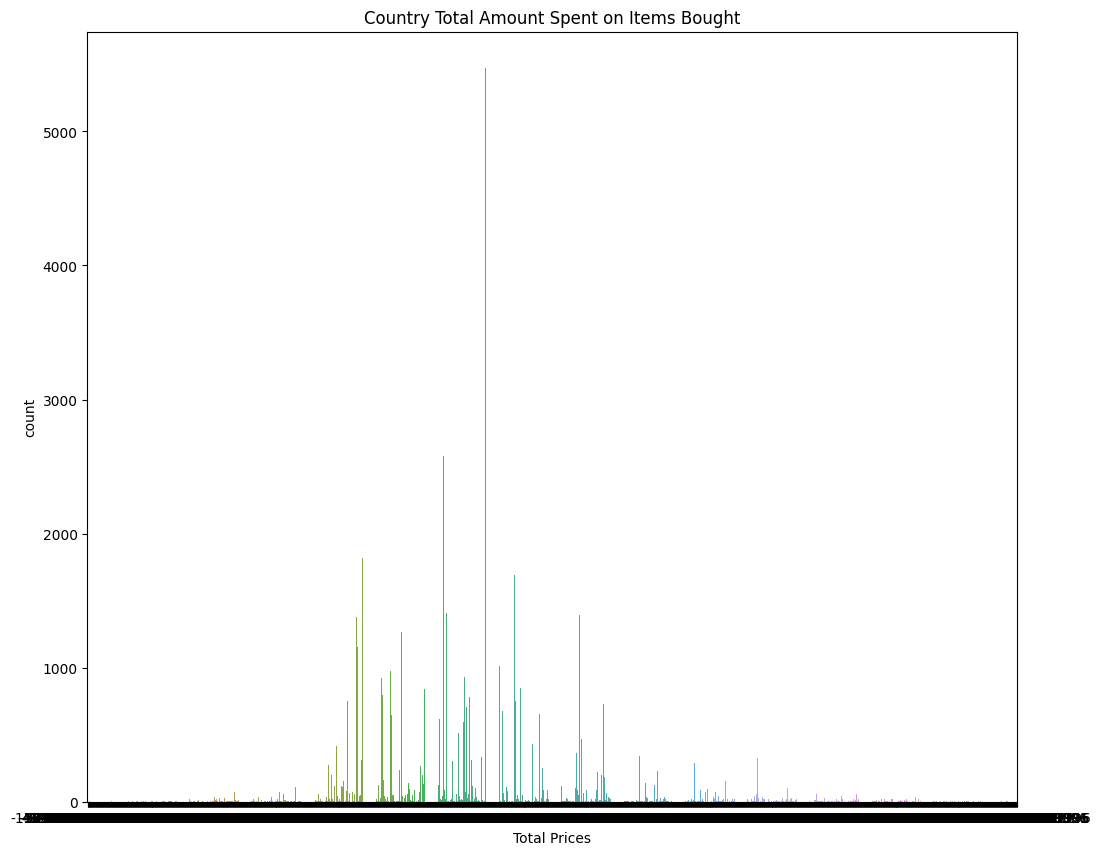

In [281]:
f, ax = plt.subplots(figsize=(12, 10))
sns.countplot(x='TotalPrice', data=data)
plt.title('Country Total Amount Spent on Items Bought')
plt.xlabel('Total Prices')

In [350]:
# Save the transformed data to a new CSV file
data.to_csv("transformed_ecommerce_data.csv", index=False)

### Building a Classification Model with the data

In [282]:
from sklearn.neighbors import KNeighborsClassifier
from seaborn import load_dataset

In [283]:
# Splitting our DataFrame into features and target
data = data.dropna()

X = data[['TotalPrice']]
y = data['Quantity']

In [284]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [285]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [286]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [287]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [288]:
y_pred = classifier.predict(X_test)

In [289]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\kuria\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuria\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        -720       0.00      0.00      0.00         1
        -600       0.00      0.00      0.00         0
        -200       0.00      0.00      0.00         2
        -144       0.14      1.00      0.25         1
        -120       0.00      0.00      0.00         1
        -100       1.00      0.67      0.80         3
         -96       0.00      0.00      0.00         2
         -72       0.00      0.00      0.00         2
         -64       0.00      0.00      0.00         1
         -50       0.33      0.50      0.40         2
         -48       1.00      0.50      0.67         8
         -42       0.00      0.00      0.00         1
         -40       0.00      0.00      0.00         1
         -36       0.14      0.25      0.18         4
         -33       0.00      0.00      0.00         1
         -32       0.00      0.00      0.00         1
         -30       0.00      0.00      0.00         0
         -25       0.50    

C:\Users\kuria\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuria\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuria\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

In [290]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

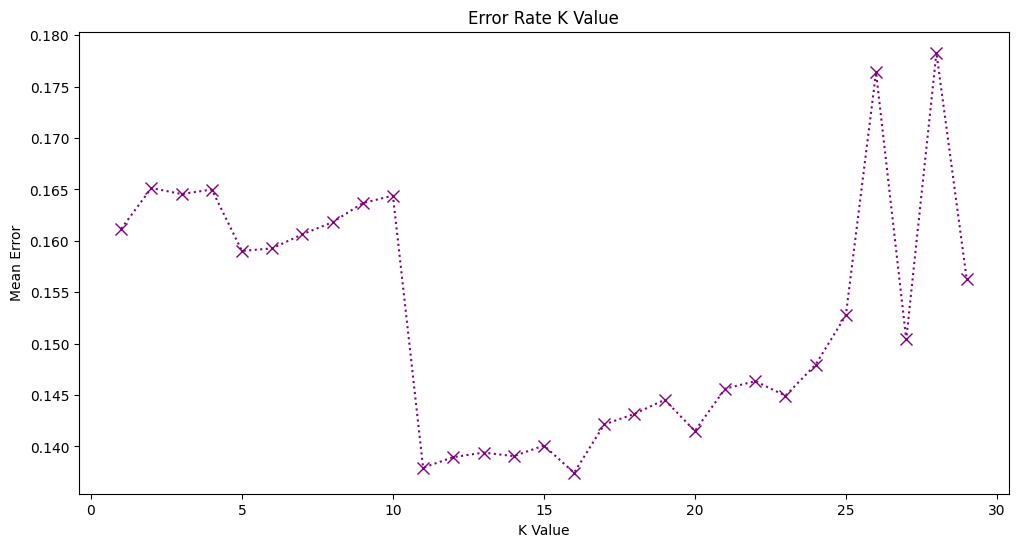

In [291]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='purple', linestyle='dotted', marker='x',
         markerfacecolor='green', markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')